#ARIMA
###AutoRegresssive Integrated Moving Averages
###AR: Autoregressive A model that uses the dependent relationship between an obervation and some nuber of lagged observation.

###I : Integrated.The use of differencing of raw observations(e.g. subtracting an observation from an observation at the previous time step) in orer to make the time series stationary.

###MA: Moving Averages: A model that uses the dependency between an observation and a residual error from a moving average model applie to lagged observations.

###p : The number of lag observations included in the model ,also called the lag order.

###d:The number of times that the raw observations are differenced , also called the degree of differencing.

###q  : The size of moving averrage window ,also called the order of moving averages.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from  statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [8]:
da = pd.read_csv('/content/CleanedData.csv',index_col =0)
da.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
07-01-2017,903.487000,908.585022,823.556030,908.585022,908.585022,279550016
08-01-2017,908.174988,942.723999,887.249023,911.198975,911.198975,158715008
09-01-2017,913.244019,913.685974,879.807007,902.828003,902.828003,141876992
10-01-2017,902.440002,914.872986,901.059998,907.679016,907.679016,115808000
11-01-2017,908.114990,919.447998,762.765015,777.757019,777.757019,310928992


In [10]:
da.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,33071628362
04-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,32781672711
05-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,32781672711
06-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,30208048289
07-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,32781672711


In [9]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 07-01-2017 to 07-01-2022
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1827 non-null   float64
 1   High       1827 non-null   float64
 2   Low        1827 non-null   float64
 3   Close      1827 non-null   float64
 4   Adj Close  1827 non-null   float64
 5   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9+ KB


AttributeError: ignored

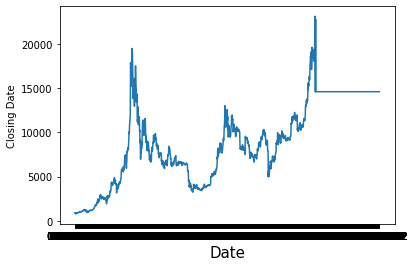

In [13]:
plt.plot(da.index,da['Adj Close'])
plt.xlabel('Date',Fontsize =15)
plt.ylabel('Closing Date',Fontsize= 15)
plt.title('Bitcoin Price')
plt.show()

In [ ]:
# Train test split 
to_row = int(len(da)*0.5)
training_data = list(da[0:to_row]['Adj Close'])
testing_data = list(da[to_row:]['Adj Close'])
testing_data

[12573.8125,
 12156.5127,
 11358.66211,
 11815.98633,
 11392.37891,
 10256.05859,
 10895.08984,
 9477.641602,
 9693.802734,
 10666.48242,
 10530.73242,
 10767.13965,
 10599.10547,
 10343.10645,
 9900.767578,
 9811.925781,
 9911.841797,
 9870.303711,
 9477.677734,
 9552.860352,
 9519.145508,
 9607.423828,
 10085.62793,
 10399.66895,
 10518.174809999999,
 10821.72656,
 10970.18457,
 11805.65332,
 11478.16895,
 11941.96875,
 11966.407229999999,
 11862.936520000001,
 11354.02441,
 11523.5791,
 11382.61621,
 10895.83008,
 10051.7041,
 10311.5459,
 10374.33887,
 10231.74414,
 10345.81055,
 10916.05371,
 10763.23242,
 10138.049809999999,
 10131.05566,
 10407.96484,
 10159.96094,
 10138.51758,
 10370.82031,
 10185.5,
 9754.422852,
 9510.200195,
 9598.173828,
 9630.664063,
 9757.970703,
 10346.76074,
 10623.54004,
 10594.49316,
 10575.5332,
 10353.30273,
 10517.25488,
 10441.27637,
 10334.97461,
 10115.97559,
 10178.37207,
 10410.12695,
 10360.54688,
 10358.04883,
 10347.71289,
 10276.79395,
 1

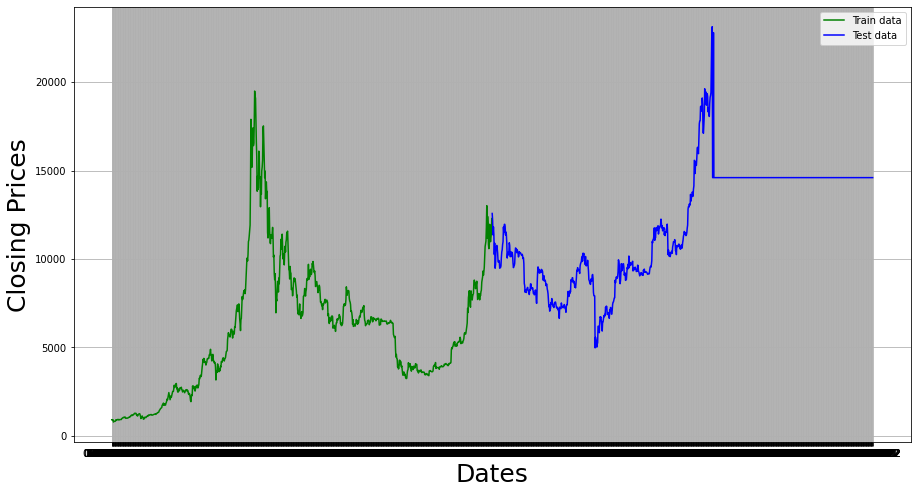

In [ ]:
#split data into training and testing
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates',fontsize = 25)
plt.ylabel('Closing Prices', fontsize = 25)
plt.plot(da[0:to_row]['Adj Close'],'green',label ='Train data')
plt.plot(da[to_row:]['Adj Close'],'blue',label ='Test data')
plt.legend()

In [ ]:
model_prediction =[]
n_test_obser = len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data,order=(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_prediction.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1825
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -13752.458
Method:                       css-mle   S.D. of innovations            453.326
Date:                Sun, 23 Jan 2022   AIC                          27516.916
Time:                        18:23:03   BIC                          27549.972
Sample:                             1   HQIC                         27529.110
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5027      7.914      0.948      0.343      -8.009      23.014
ar.L1.D.y     -0.1765      0.023     -7.543      0.000      -0.222      -0.131
ar.L2.D.y     -0.2268      0.024     -9.566      0.000      -0.273      -0.180
ar.L3.D.y      0.0655      0.024      2.764      0.006       0.019       0.112
ar.L4.D.y     -0.0033      0.023     -0.140      0.889      -0.049       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6555           -1.6794j            1.8028           -0.3092
AR.2           -0.6555           +1.6794j            1.8028            0.3092
AR.3            6.2143           -0.0000j            6.2143           -0.0000
AR.4           15.1724           -0.0000j           15.1724           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
len(testing_data)

914

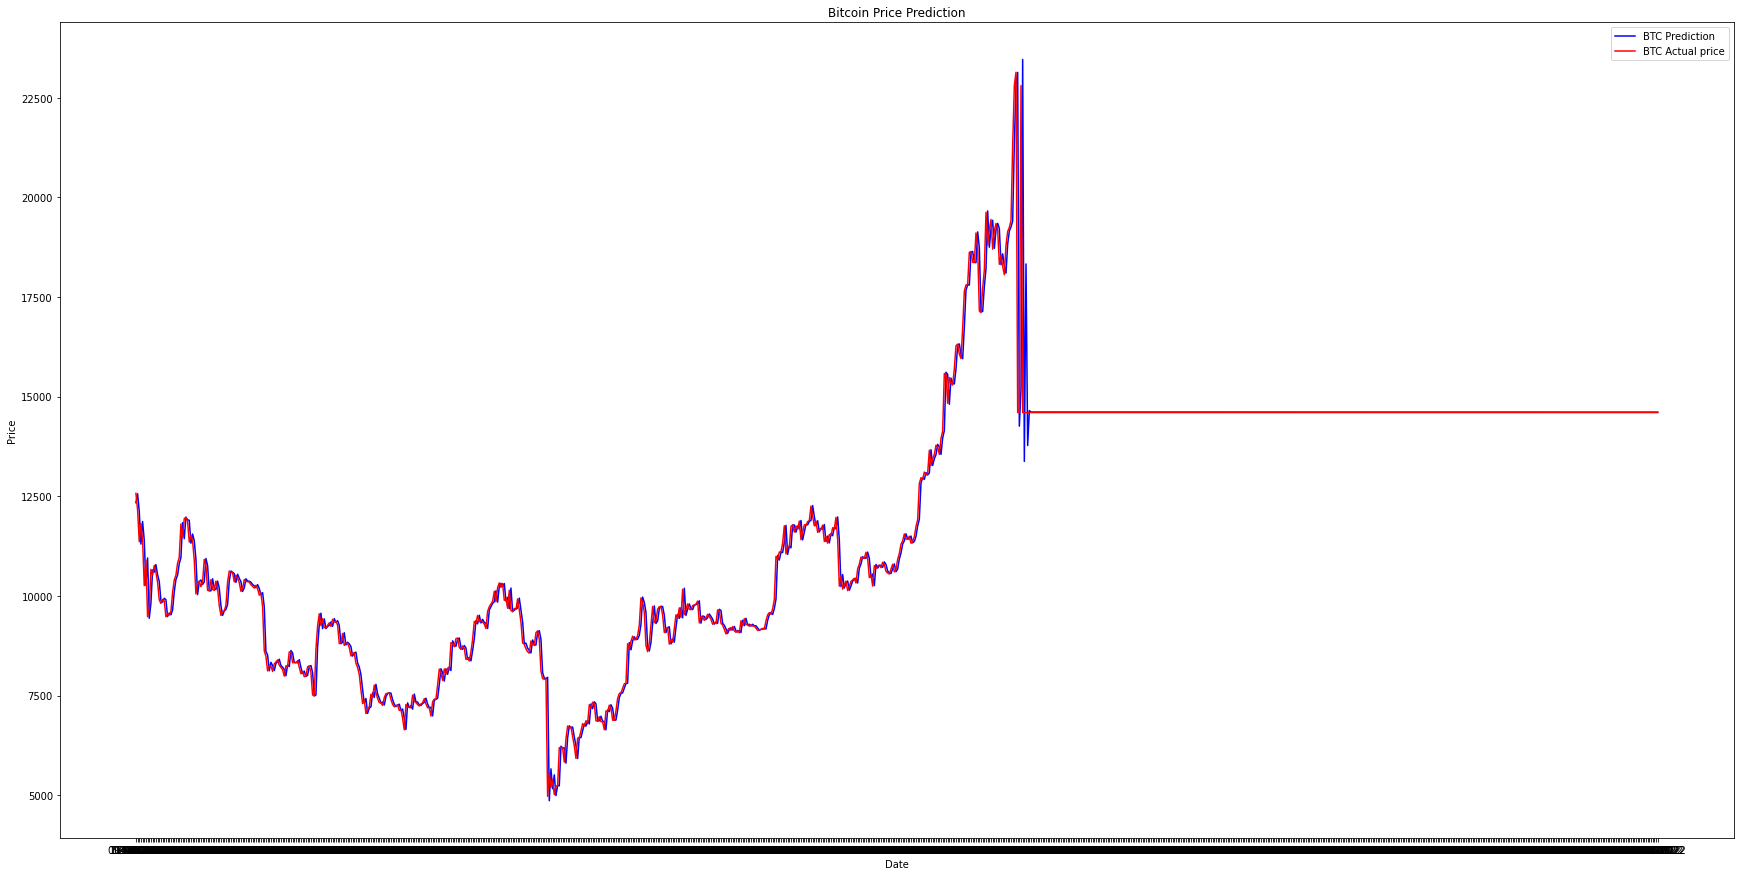

In [ ]:
plt.figure(figsize=(30,15))

plt.grid(False)

date_range = da[to_row:].index

plt.plot(date_range, model_prediction[:],color = 'blue',label ='BTC Prediction')
plt.plot(date_range ,testing_data,color = 'red',label ='BTC Actual price')
plt.xticks(visible =True)  
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# report performance
mape = np.mean(np.abs(model_prediction[:-1])) - np.array(testing_data)/np.abs(testing_data)
print('MAPE:'+ str(mape)) #Mean absolute Error


MAPE:[12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 12007.7492618 12007.7492618 12007.7492618 12007.7492618 12007.7492618
 